In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(27)

In [2]:
means = [[0, 0], [2, 7], [7, 2]]
cov = [[2, 0], [0, 2]]  # covariance matrix
n = 500
X0 = np.random.multivariate_normal(means[0], cov, n)
X1 = np.random.multivariate_normal(means[1], cov, n)
X2 = np.random.multivariate_normal(means[2], cov, n)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*n + [1]*n + [2]*n).T

In [3]:
X.shape
print(original_label)

[0 0 0 ... 2 2 2]


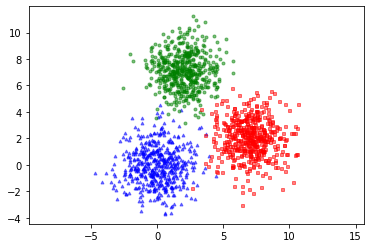

In [4]:
K = np.amax(original_label) + 1
X0 = X[original_label == 0, :]
X1 = X[original_label == 1, :]
X2 = X[original_label== 2, :]
    
plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 3, alpha = .5)
plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 3, alpha = .5)
plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 3, alpha = .5)

plt.axis('equal')
plt.plot()
plt.show()

In [35]:
################## Implement K MEANS ############

def MyKmeans(X,K, max_ite):
    # Step 1
    # choose random [num1,num2,...numk]
    k_num = np.random.choice(range(0,len(X)), K, replace=False)
    centroids = X[k_num, :]   
    print("random centroids: ",centroids)
    # Step 2
    # distance of a point to all cluster centtroids
    dist2centroids = cdist(X, centroids ,'euclidean') # Shape n*k
    # point with the minimum Distance
    cluster = np.array([np.argmin(i) for i in dist2centroids])  # Shape 1*n
    print("initial cluster: ",cluster)
    # Step 3
    # Repeating step 2 until manually stop (max_iteration) or || c_new - c_old ||^2 <= e
    for i in range(max_ite): 
        centroids = []
        for j in range(K):
            # Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = X[cluster==j].mean(axis=0)  
            centroids.append(temp_cent)
        # Updated Centroids 
        centroids = np.vstack(centroids) 
        dist2centroids = cdist(X, centroids ,'euclidean') # Shape n*k
        cluster = np.array([np.argmin(i) for i in dist2centroids])  # Shape 1*n
        print(centroids)
    return cluster

clustered_label = MyKmeans(X,3,10)


random centroids:  [[ 2.2366666   9.00649656]
 [ 2.86005504  6.91487373]
 [ 3.04239439 -1.52461212]]
initial cluster:  [2 2 2 ... 1 2 2]
[[1.56668195 8.55933149]
 [3.48621789 5.48736573]
 [2.98682196 0.47007499]]
[[1.5307143  7.84965105]
 [4.61611538 4.82793832]
 [2.79272537 0.43966037]]
[[1.69443455 7.36984725]
 [6.47693653 3.29019278]
 [1.49629942 0.05887602]]
[[ 1.9413229   7.14644088]
 [ 6.98851275  2.16858772]
 [ 0.11125109 -0.07408469]]
[[ 1.98581977e+00  7.09656636e+00]
 [ 6.99220770e+00  2.04958403e+00]
 [-5.92313364e-03 -7.24786166e-02]]
[[ 1.99456896  7.08250005]
 [ 6.99355778  2.03262459]
 [-0.01418068 -0.08014624]]
[[ 1.99456896  7.08250005]
 [ 6.99355778  2.03262459]
 [-0.01418068 -0.08014624]]
[[ 1.99456896  7.08250005]
 [ 6.99355778  2.03262459]
 [-0.01418068 -0.08014624]]
[[ 1.99456896  7.08250005]
 [ 6.99355778  2.03262459]
 [-0.01418068 -0.08014624]]
[[ 1.99456896  7.08250005]
 [ 6.99355778  2.03262459]
 [-0.01418068 -0.08014624]]


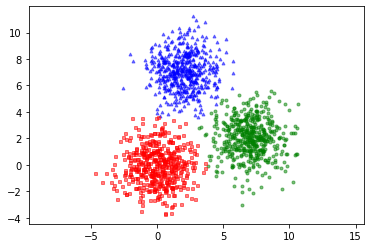

In [36]:
K = np.amax(clustered_label) + 1
X0 = X[clustered_label == 0, :]
X1 = X[clustered_label == 1, :]
X2 = X[clustered_label == 2, :]
    
plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 3, alpha = .5)
plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 3, alpha = .5)
plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 3, alpha = .5)

plt.axis('equal')
plt.plot()
plt.show()

In [37]:
####### K MEANS SKLEARN #############

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
print(pred_label)
x_test = np.array([[5, 1]])
kmeans.predict(x_test)

Centers found by scikit-learn:
[[ 1.99456896  7.08250005]
 [ 6.99355778  2.03262459]
 [-0.01418068 -0.08014624]]
[2 2 2 ... 1 1 1]


array([1], dtype=int32)

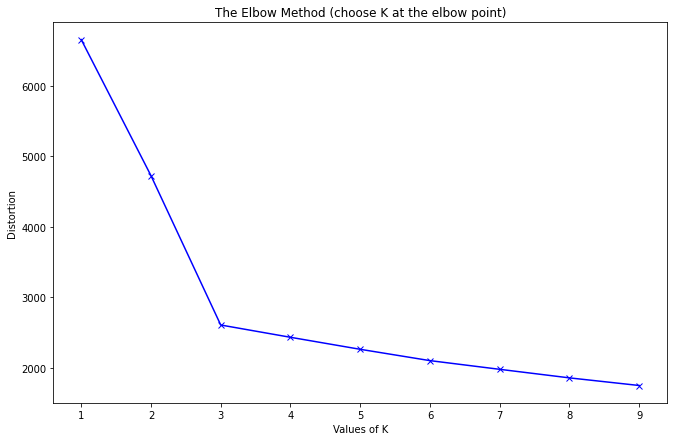

In [38]:
############# ELBOW METHOD ################

from scipy.spatial.distance import cdist

loss_list = []
K = 10
for i in range(1, K):
  kmeans_i = KMeans(n_clusters=i, random_state=0)
  kmeans_i.fit(X)
  dist2centroids = cdist(X, kmeans_i.cluster_centers_, 'euclidean')               # shape n*k
  # print(dist2centroids)
  min_distance = np.min(dist2centroids, axis=1)   # axis=1:  min in each row      # shape n*1
  # print(min_distance)
  loss = np.sum(min_distance)
  loss_list.append(loss)

plt.figure(figsize=(11, 7))
plt.plot(np.arange(1, K), loss_list, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method (choose K at the elbow point)')
plt.show()